# Data Science Methodology Notes

## Data Preparation

* Removing unwanted elements is often necessary.
* Often records will need to be aggregated e.g. patients need to have data for their health records, financial records, etc.
* Obtaining literary review for factors related to the target variable is most often a big part of the iterative cycle.

The data will eventually be best-used if emerged into a single table.

## 🧪 Case Study Lab

The data for this lab can be found [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv)

#### Imports

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('./recipes.csv')
df.shape

(57691, 384)

In [63]:
df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


### Japanese Recipe?

Let's say we want to make sushi. This contains:
* rice
* soy sauce
* wasabi
* fish/vegetables

In [64]:
'rice' in df.columns, 'soy_sauce' in df.columns, 'wasabi' in df.columns, 'fish' in df.columns

(True, True, True, True)

So a naive approach to classifying a recipe as japanese is by saying it contains sushi ingredients

Note that instead of 'True' 'False' the columns are all strings 'Yes', 'No'

In [65]:
df['almond'].value_counts()

almond
No     55362
Yes     2329
Name: count, dtype: int64

But if we filter based on this naiive approach we can see this is untrue: other `asian` cuisines have these ingredients, and even an `american` cuisine has a recipe including these ingredients.

In [66]:
sushi_columns = ['rice', 'soy_sauce', 'wasabi', 'fish']
df[(df[sushi_columns] == 'Yes').all(axis=1)]

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
11321,Japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Yes,No,No,No,No,No
12171,Asian,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Yes,No,No,No,No,No
13513,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13625,east_asian,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
41953,American,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


#### Renaming Columns

You can juse use a key value object with old:new mappings to rename. Note you need to either specify inplace or instantiate the return to an object.

In [67]:
df = df.rename(columns = {'country': 'cuisine'})
df.head(5)

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


### Cleaning Object Values

Every single column in the dataframe is represented as an *object*, which isn't necessarily good. We'll encode it here

In [68]:
sum(df.dtypes.values == 'O'), len(df.columns)

(384, 384)

The below cell will encode the recipes as boolean

In [69]:
# Take all the features, ignore cuisine for now since it isn't boolean
columns_to_encode = list(df.select_dtypes('O').drop('cuisine', axis=1).columns)

for col in columns_to_encode:
    df[col] = df[col].apply(lambda x: True if x == 'Yes' else False)

df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Vietnamese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Filtering

Here we'll remove cuisines with $<50$ recipes

In [70]:
df.shape

(57691, 384)

In [71]:
original_length = len(df['cuisine'].value_counts().index)
original_length

69

In [72]:
counts = df['cuisine'].value_counts()
large_categories = counts[counts >= 50].index

df = df[df['cuisine'].isin(large_categories)]
new_length = len(df['cuisine'].value_counts().index)
new_length

49

You can see we removed some `20` regions of cuisines with their total of `390` cumulative recipes (the rows)

In [73]:
df.shape

(57301, 384)

### Most Popular Ingredients

The below will get the top 10 recipes cumulatively

* Eggs, wheat, butter, onion, and garlic are used pretty much universally.
* Fats like milk, cream, oils also come up pretty often
* Tomato is also pretty popular

In [81]:
df[df.select_dtypes('bool')].sum().sort_values(ascending=False)[:10]

egg              21012
wheat            20768
butter           20709
onion            18038
garlic           17296
milk             12866
vegetable_oil    11077
cream            10167
tomato            9909
olive_oil         9865
dtype: object

### Ingredients by Cuisine

In [82]:
df['cuisine'].value_counts().index

Index(['American', 'Mexico', 'Italian', 'Italy', 'Asian', 'French',
       'east_asian', 'Canada', 'korean', 'Mexican', 'western',
       'Southern_SoulFood', 'India', 'Jewish', 'Spanish_Portuguese',
       'Mediterranean', 'UK-and-Ireland', 'Indian', 'France', 'MiddleEastern',
       'Central_SouthAmerican', 'Germany', 'Eastern-Europe', 'Chinese',
       'Greek', 'English_Scottish', 'Caribbean', 'Thai', 'Scandinavia',
       'Cajun_Creole', 'EasternEuropean_Russian', 'Moroccan', 'Japanese',
       'China', 'Thailand', 'African', 'Southwestern', 'South-America',
       'japanese', 'Scandinavian', 'chinese', 'Irish', 'Japan', 'Spain',
       'italian', 'Vietnamese', 'North-African', 'German', 'Portugal'],
      dtype='object', name='cuisine')

🇺🇸 Looks like Americans particularly like **Vanilla**, **Molasses** and varieties of **Peppers**

In [128]:
sums[-10:]

pepper            6760
vegetable_oil     7524
cream             7899
vanilla           7912
garlic            9665
milk             10680
onion            11777
wheat            15996
egg              16266
butter           16525
dtype: int64

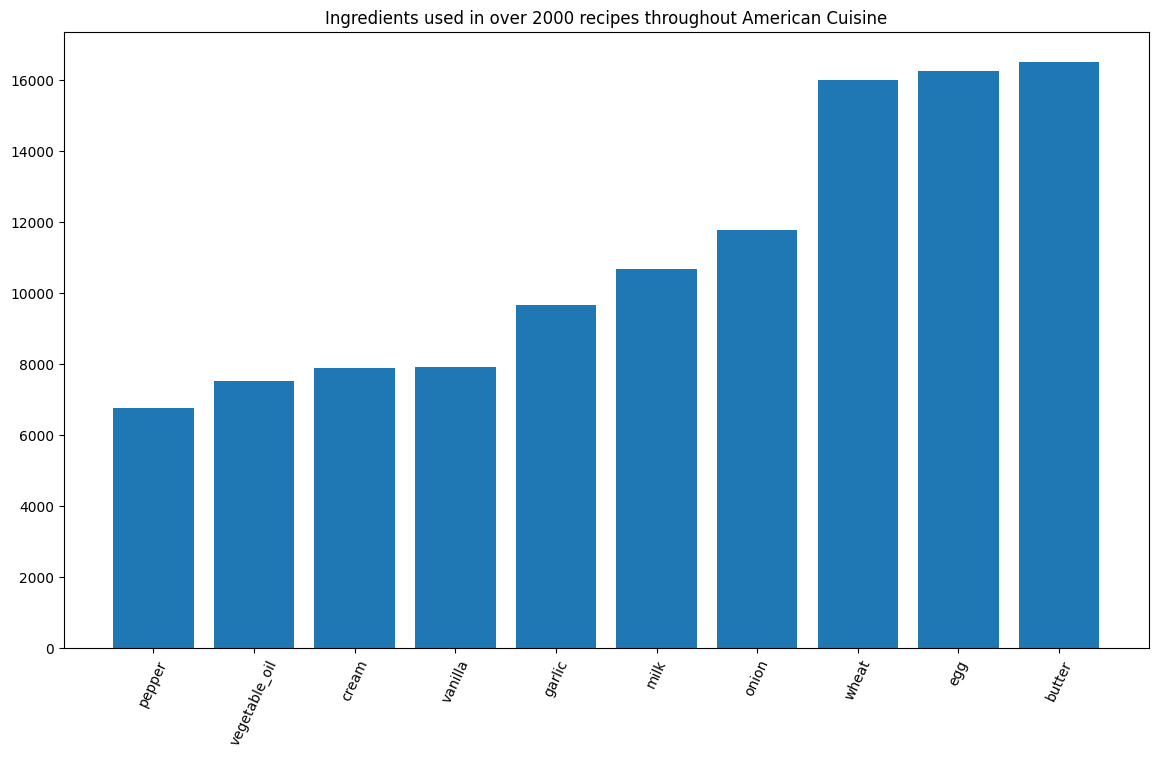

In [130]:
sums = df[df['cuisine'] == 'American'].select_dtypes('bool').sum().sort_values(ascending=True)[-10:]
plt.figure(figsize = (14, 8))
# filtered_sums = {key: value for key, value in sums.items() if value > 2000}
# plt.bar(list(filtered_sums.keys()), filtered_sums.values())
plt.bar(sums.keys(), sums.values)
plt.title("Ingredients used in over 2000 recipes throughout American Cuisine")
plt.xticks(rotation=65)
plt.show()

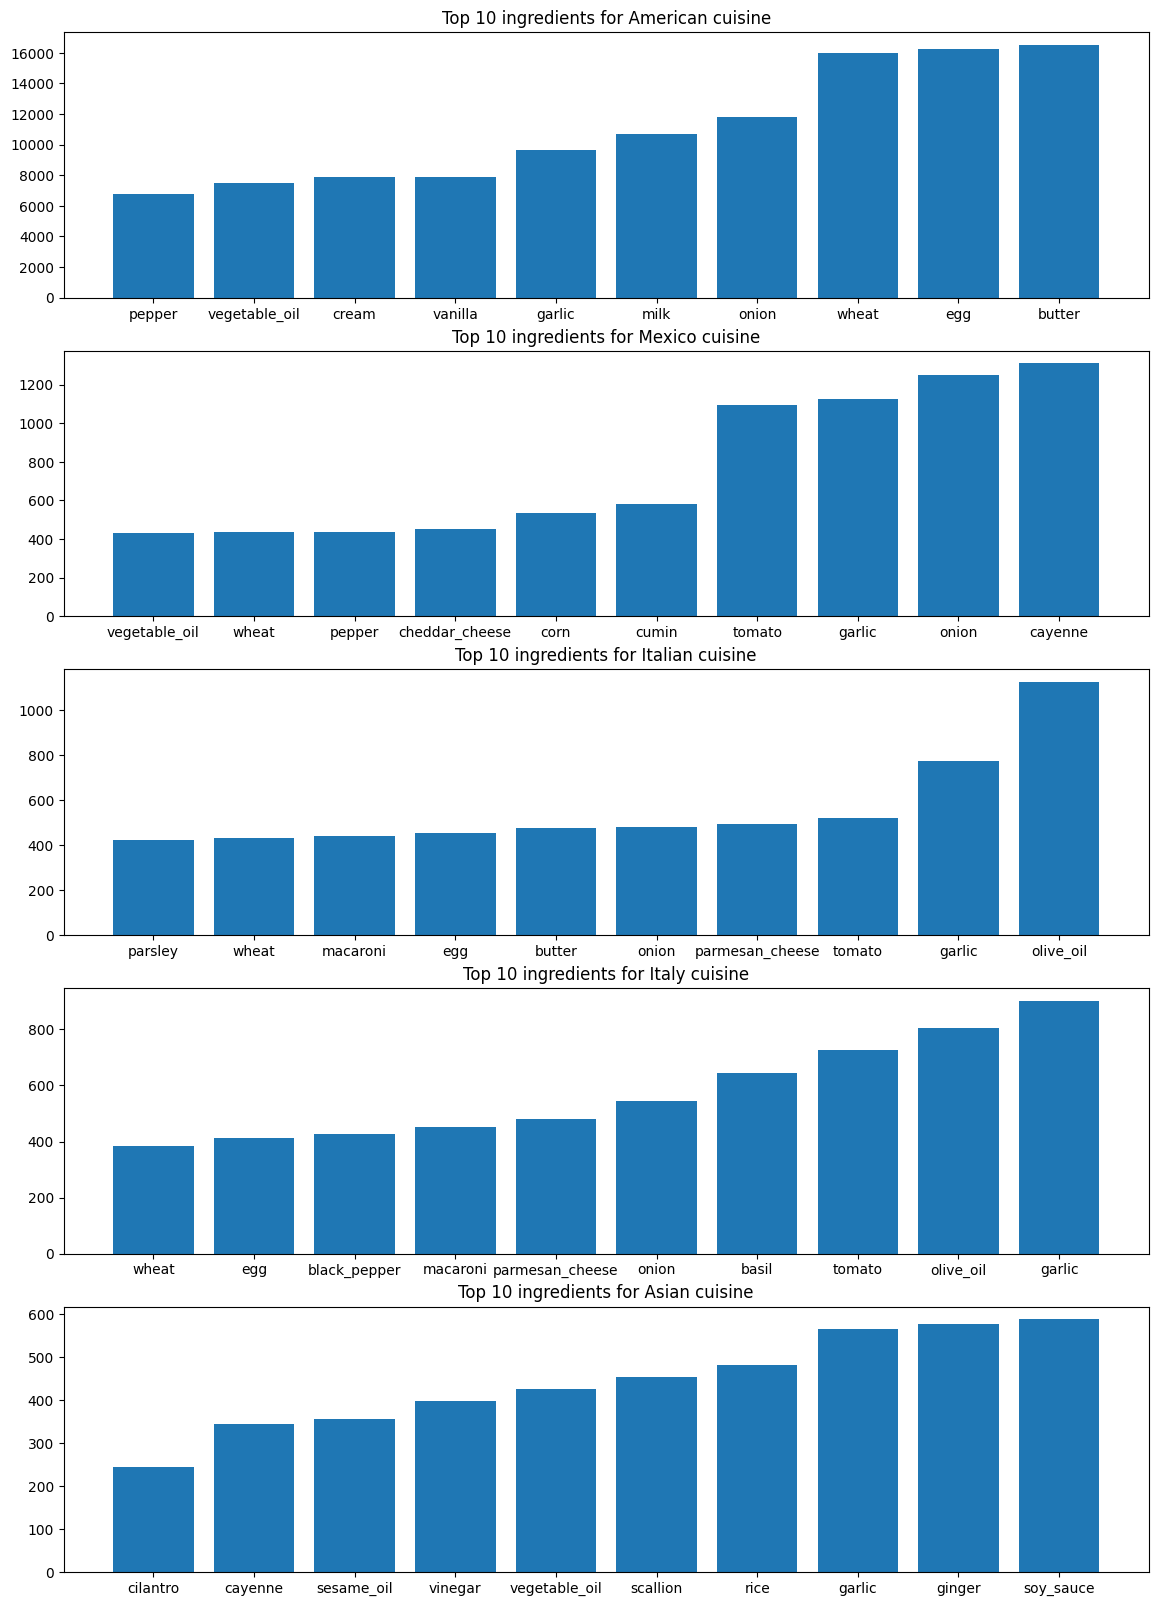

In [181]:
cuisines = df['cuisine'].value_counts().index
fig, axes = plt.subplots(5, 1)
fig.set_figheight(4 * 5)
fig.set_figwidth(14)

# Only show first 5 to keep notebook size down
for i in range(5):
    df_temp = df[df['cuisine'] == cuisines[i]]
    sums = df_temp.select_dtypes('bool').sum().sort_values()[-10:]
    axes[i].bar(list(sums.keys()), sums.values)
    axes[i].set_title("Top 10 ingredients for "+cuisines[i] + " cuisine")

plt.show()

### Asian-Indian Cuisines

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
asian_indian_cuisines = ['korean', 'japanese', 'chinese', 'thai', 'indian']
df_asian_indian = df[df['cuisine'].isin(asian_indian_cuisines)]
df_asian_indian

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
13408,chinese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13409,chinese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13410,chinese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13411,chinese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13412,chinese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15787,korean,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15788,korean,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15789,korean,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15790,korean,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [177]:
df_asian_indian['cuisine'].value_counts().index

Index(['korean', 'japanese', 'chinese'], dtype='object', name='cuisine')

Fit a Decision Tree Classifier to the Asian-Indian Cuisines

In [163]:
X = df_asian_indian[df_asian_indian.drop('cuisine', axis=1).columns]
y = df_asian_indian['cuisine']

dcf = DecisionTreeClassifier(max_depth=3)
dcf.fit(X, y)
dcf

DecisionTreeClassifier(max_depth=3)

In [170]:
X.shape, y.shape

((952, 383), (952,))

In [160]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.3 MB/s eta 0:00:00


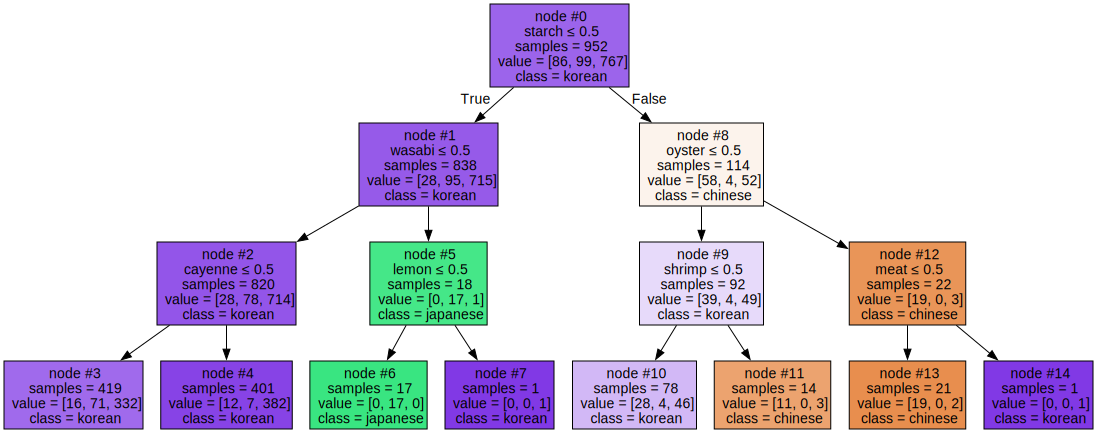

In [171]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dcf,
                feature_names=list(X.columns.values),
                out_file="bamboo_tree.dot",
                class_names=np.unique(df_asian_indian['cuisine']),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("asian_indian_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

Observations from the tree:
* Japanese don't use starchy recipes whereas chinese and koreans do
* Koreans will do starchy foods with oyster just oyster. Chinese do starchy foods with oyster and meat or oyster and shrimp (they'll combine other proteins with oyster)
* Japanese will add just wasabi, whereas Koreans do both Lemon and Wasabi in their recipes. Koreans are also likely to add cayenne to their wasabi dishes.

## 🦾 Modeling

Focuses on models that are either:
* descriptive - if a person did $x$, they are likely to do $y$
* predictive

Of course, you have training, validation, and testing sets to see how models perform and to evaluate how well they can generalize


Important to:
1) Understand the question at hand
2) Select an analytic approach or method to solve the problem
3) Obtain, understand, prepare, and model the data

When creating ML models you want to adjust the weights in training to penalize errors that are related to the real-world application.

For example, classifying fungi as **poisonous** or **edible**, one would want to minimize False Negatives (Type II Error) so that poisonous specimens aren't misclassified as edible. The costs of different misclassification errors can be different.

Decision tree algorithms allow tweaking the setting as well on relative cost.

The **ROC** curve (Receiver Operating Characteristic curve) is good for determining the optimal classification model in binary classification.

## Feedback

Define the review process, tracking the targets in testing data and recording values. Measure the effectiveness of the application in real-world outcomes (business impact, etc.)

# Data Science 101

Advice: Be curious, be argumentative, have an open mind.

Having some domain expertise will allow you to acquire some industry-specific analytical skills as well.

Regression is often more important in **quantifying** the value in parameters to make predictions. Finding the actual value of the correlations (rather than determining whether there is or isn't a correlation).

Data never gets old, it is always relevant. Keep it, capture it, archive it and maintain consistency.

Storytelling is very important: often data scientists have a role of using their techincal skills to interpret information, and to convey this in short reports in a very meaningful way.